# Lab 5: Singly Linked List

Lecturer: <code>Sirasit Lochanachit</code>

Course:

<code>01526102 Data Sturctures and Algorithms [SIIE]
</code>

Term: <code>02/2024</code>

---

# Implementing a Node for Linked Lists (Example)

A node has only two instance variables: `_element` and `_next`.

1. The `_element` variable is a reference to values/elements stored.
2. The `_next` member points to the subsequent node.

In [ ]:
class _Node:
  """Lightweight, nonpublic class for storing a singly linked node."""
  __slots__ = '_element' , '_next'    # streamline memory usage for large number of instances/nodes

  def __init__ (self, element, next):   # initialize node’s fields/properties/attributes
    self._element = element             # reference to user’s element
    self._next = next                   # reference to next node

# Singly Linked List

Given an example of a Singly Linked List below, the root node has two instance variables: `_count` and `_head` whereas a data node has two instance variables: `_name` and `_next`

![image.png](attachment:image.png)

Define a Singly Linked List class and DataNode class

In [ ]:
class SinglyLinkedListBase:
    def __init__(self):
        self._count = 0
        self._head = None

class DataNode:
    def __init__(self, name, next):
        self._name = name
        self._next = next

Example of creating SinglyLinkedList and DataNode instances

![image.png](attachment:image.png)

In [ ]:
myList = SinglyLinkedListBase()

![image.png](attachment:image.png)

In [ ]:
pNew = DataNode("John", None)

![image.png](attachment:image.png)

In [ ]:
myList._head = pNew
myList._count += 1

In [ ]:
print("Head node is: " + myList._head._name)
print(f"Node count: {myList._count}")

Head node is: John
Node count: 6


![image.png](attachment:image.png)

In [ ]:
pNew2 = DataNode("Tony", None)

![image.png](attachment:image.png)

In [ ]:
myList._head._next = pNew2
myList._count += 1

In [ ]:
print("Head node is: " + myList._head._name)
print(f"Next node is: {myList._head._next._name}")
print(f"Node count: {myList._count}")

Head node is: John
Next node is: Tony
Node count: 7


# Lab 5-1 Implement Singly Linked List Operations

## 1.1 Problem Description

Implement 5 Singly Linked List Operations in a SinglyLinkedList class
* traverse(): Print all names in the list in a sequential order
  * If a list is empty, print "This is an empty list"
  * Create `current` pointer to keep track of the current node while traversing
* insertFront(data): Create new data node and insert this node at the front of the linked list
* insertLast(data): Create new data node and insert this node at the back of the linked list
* insertBefore(node_name, data): Create new data node and insert this node before the given node in the linked list
  * If a given node is not found in the linked list, print "Cannot insert, <node_name> does not exist."
  * Create `prev` and `current` variables to keep track of the node before and the given node.
* delete(data): Delete a node correspond to the given data from the linked list
  * If a given node is not found in the linked list, print "Cannot delete, <node_name> does not exists."
  * Create `prev` pointer to keep track of the node before the deleted node
  * Create `current` pointer variable to keep track of the next node after the deleted node.

Note: Use `DataNode` class (as defined above) to create a new data node.

In [243]:
class SinglyLinkedList(SinglyLinkedListBase):       # Extend from SinglyLinkedListBase class defined earlier

    #self._count = 0        Inherited from SinglyLinkedListBase class
    #self._head = None      Inherited from SinglyLinkedListBase class

    def traverse(self):
        current = None
        if self._head is None:
            print("This is an empty list.")

        current = self._head
        while current is not None:
          print(current._name, end=" -> " if current._next else "\n")
          current = current._next


    def insertFront(self, data):
        pNew = DataNode(data, None)
        pNew._next = self._head
        self._head = pNew
        self._count += 1
        return pNew



    def insertLast(self, data):
        pNew = DataNode(data, None)
        if self._head is None:
          self._head = pNew
        else:
          current = self._head
          while current._next is not None:
            current = current._next
          current._next = pNew
        self._count += 1


    def insertBefore(self, node_name, data):
       pNew = DataNode(data, None)
       if self._head is None:
        print(f"Cannot insert, {node_name} doesn't exist.")
        return

    # Case 1: If the node to insert before is the head
       if self._head._name == node_name:
        pNew._next = self._head  # Set the new node's next to the current head
        self._head = pNew  # Update the head of the list to the new node
       else:
        current = self._head
        while current._next is not None:  # Traverse through the list
            if current._next._name == node_name:  # Found the node
                pNew._next = current._next  # Set the new node's next to the next node
                current._next = pNew  # Link the current node to the new node
                break  # Node found, exit the loop
            current = current._next  # Move to the next node

        # If the node_name wasn't found
        if current._next is None:
            print(f"Cannot insert, {node_name} doesn't exist.")
            return

       self._count += 1  # Increment the count of nodes




    def delete(self, data):
    # Case 1: If the list is empty
      if self._head is None:
        print(f"Cannot delete, {data} does not exist.")
        return

    # Case 2: If the node to delete is the head node
      if self._head._name == data:
        self._head = self._head._next  # Update the head to the next node
        self._count -= 1  # Decrease the count
        return

    # Case 3: If the node is not the head, traverse the list to find the node
      prev = None
      current = self._head
      while current is not None:
        if current._name == data:
          prev._next = current._next  # Remove the current node from the list
          self._count -= 1  # Decrease the count
          return
        prev = current  # Move to the next node
        current = current._next

    # Case 4: If the node was not found in the list
      print(f"Cannot delete, {data} does not exist.")




    def access(self, index):
        # eg., list1.access(2)
        current = self._head
        count = 0
        while current is not None:
            if count == index:
                return current._name
            count += 1
            current = current._next
        return None

    def getSize(self):
        # eg., list1.getSize()
        return self._count

## Testing codes

In [244]:
list1 = SinglyLinkedList()

list1.traverse()

list1.insertBefore("Kim", "Ko")

print("Add John...")
list1._head = DataNode("John", None)
list1._count += 1

print("Head node is: " + list1._head._name)
print(f"Node count: {list1.getSize()}")

This is an empty list.
Cannot insert, Kim doesn't exist.
Add John...
Head node is: John
Node count: 1


In [245]:
print("Add Tony...")
pNew = DataNode("Tony", None)
print("Address of Node-Tony: ", hex(id(pNew)))
list1._head._next = pNew
print("Value of list1.head.next: ", list1._head._next)
list1._count += 1

print(f"Next node is: {list1._head._next._name}")
print(f"Node count: {list1.getSize()}")

Add Tony...
Address of Node-Tony:  0x7d2799501e10
Value of list1.head.next:  <__main__.DataNode object at 0x7d2799501e10>
Next node is: Tony
Node count: 2


In [246]:
list1.traverse()

John -> Tony


In [247]:
print("Add Bill...")
pNew = DataNode("Bill", None)
list1._head._next._next = pNew
list1._count += 1

print(f"Next node is: {list1._head._next._name}")
print(f"Node count: {list1.getSize()}")

Add Bill...
Next node is: Tony
Node count: 3


In [248]:
list1.traverse()

John -> Tony -> Bill


In [249]:
list1.insertFront("Kim")
list1.traverse()

Kim -> John -> Tony -> Bill


In [250]:
list1.insertLast("Max")
list1.traverse()

Kim -> John -> Tony -> Bill -> Max


In [251]:
list1.insertBefore("Tony", "Andy")
list1.traverse()

Kim -> John -> Andy -> Tony -> Bill -> Max


In [252]:
list1.insertBefore("Kim", "Boyz")
list1.traverse()

Boyz -> Kim -> John -> Andy -> Tony -> Bill -> Max


In [213]:
list1.insertBefore("Kimmy", "Mike")
list1.traverse()

Cannot insert, Kimmy doesn't exist.
Boyz -> Boyz -> Kim -> John -> Andy -> Tony -> Bill -> Max


In [214]:
list1.delete("Kim")
list1.traverse()

Boyz -> Boyz -> John -> Andy -> Tony -> Bill -> Max


In [216]:
list1.delete("Boyz")
list1.traverse()

John -> Andy -> Tony -> Bill -> Max


In [217]:
list1.delete("Boy")
list1.traverse()

Cannot delete, Boy does not exist.
John -> Andy -> Tony -> Bill -> Max


In [218]:
list1.insertFront("Anna")
list1.traverse()

Anna -> John -> Andy -> Tony -> Bill -> Max


In [220]:
print(f"Node count: {list1.getSize()}")

Node count: 5


In [ ]:
list1.insertLast("Joe")
list1.traverse()

Traverse :  Anna -> John -> Andy -> Tony -> Bill -> Max -> Joe 


In [222]:
print(f"Node count: {list1.getSize()}")

Node count: 5


In [ ]:
list1.getSize()

7

In [ ]:
list1.access(list1.getSize()//2)

'John'

---

# Lab 5-2 Array List vs Singly Linked List

Given an empty list `data = []`, record the **average** running time of different insert methods in seconds with three different inserting patterns for each of the `n` calls:

*   Repeatedly insert at the beginning of a list
*   Repeatedly insert near the middle of a list
*   Repeatedly insert at the end of a list

Your task is to compare running time between array list (as defined in Lab 3-1) and singly linked list methods (as defined in Lab 5-1).

**This could run very long, so brace yourself** and make sure to limit `number` argument in `timeit()` to 10 times (default is 1,000,000 times)

## 2.1 Plot the running time of three different inserting patterns comparing between array list and singly linked list methods. Try plotting pairwise for each pattern first.
* Each test should run insert method `n` times and each test of `n` should execute 10 rounds

In [ ]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

Given input size (n) that grows from 10 to 1,000

In [ ]:
ns = np.linspace(10, 1000, 50, dtype=int)
ns

array([  10,   30,   50,   70,   90,  111,  131,  151,  171,  191,  212,
        232,  252,  272,  292,  313,  333,  353,  373,  393,  414,  434,
        454,  474,  494,  515,  535,  555,  575,  595,  616,  636,  656,
        676,  696,  717,  737,  757,  777,  797,  818,  838,  858,  878,
        898,  919,  939,  959,  979, 1000])

### Beginning of a list

In [ ]:

ts1 = [timeit.timeit(f'''
for i in range({n}):
  data.insert(0,{n})''',
               setup = 'data = []',
               number=10,
               globals=globals()) for n in ns]

ts2 = [timeit.timeit(f'for i in range({n}):data.insertFront({n})',
               setup = 'data = SinglyLinkedList()',
               number=10,
               globals=globals())
 for n in ns]

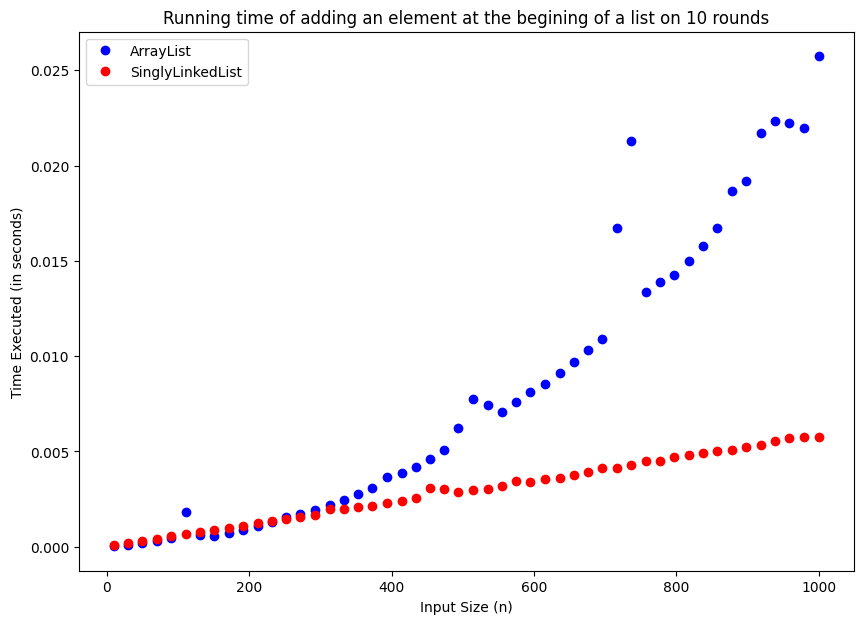

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(ns, ts1, 'ob')
plt.plot(ns, ts2, 'or');
plt.xlabel('Input Size (n)');
plt.ylabel('Time Executed (in seconds)');
plt.title('Running time of adding an element at the begining of a list on 10 rounds');
plt.legend(['ArrayList', 'SinglyLinkedList']);

### Near the middle of a list

In [ ]:
ts3 = [timeit.timeit(f'for i in range({n}): data.insert(len(data)//2,{n})',
               setup = 'data = []',
               number=10,
               globals=globals())
 for n in ns]

ts4 = [timeit.timeit(f'''
for i in range({n}):
  node_name=data.access(data.getSize()//2)
  if node_name is not None:
    data.insertBefore(node_name,i)''',
               setup = 'data = SinglyLinkedList()',
               number=10,
               globals=globals())
 for n in ns]

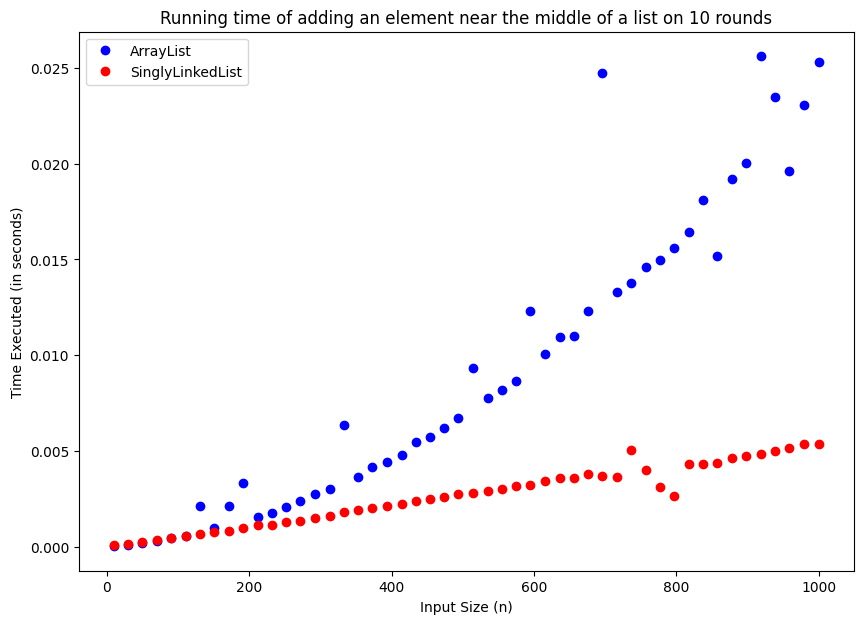

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(ns, ts3, 'ob')
plt.plot(ns, ts4, 'or');
plt.xlabel('Input Size (n)');
plt.ylabel('Time Executed (in seconds)');
plt.title('Running time of adding an element near the middle of a list on 10 rounds');
plt.legend(['ArrayList', 'SinglyLinkedList']);

### At the end of a list

In [169]:
ts5 = [timeit.timeit(f'for i in range({n}): data.append({n})',
               setup = 'data = []',
               number=10,
               globals=globals())
 for n in ns]

ts6 = [timeit.timeit(f'for i in range({n}):data.insertLast({n})',
               setup = 'data = SinglyLinkedList()',
               number=10,
               globals=globals())
 for n in ns]

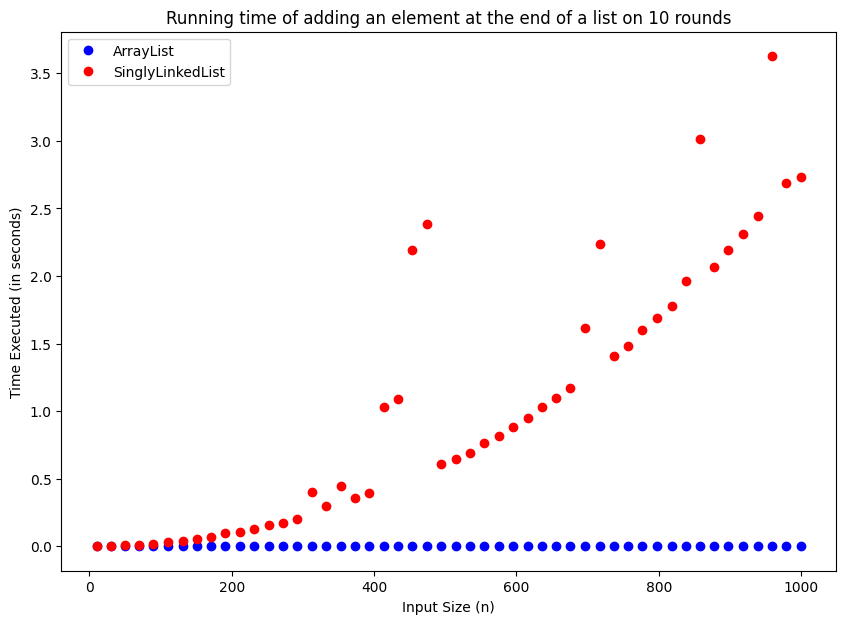

In [170]:
plt.figure(figsize=(10,7))
plt.plot(ns, ts5, 'ob')
plt.plot(ns, ts6, 'or');
plt.xlabel('Input Size (n)');
plt.ylabel('Time Executed (in seconds)');
plt.title('Running time of adding an element at the end of a list on 10 rounds');
plt.legend(['ArrayList', 'SinglyLinkedList']);

## 2.2 Combine all three plots into one plot

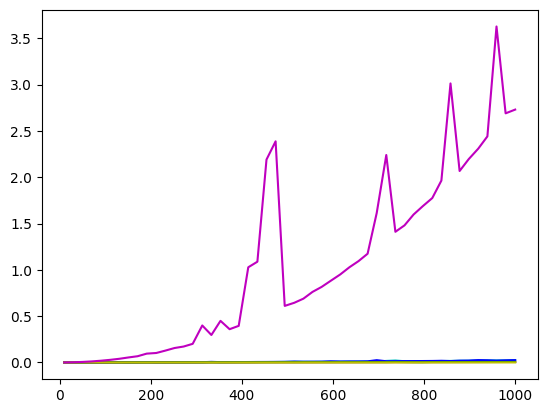

In [177]:
plt.plot(ns, ts1,'c',label=' the front of a list of ArrayList')
plt.plot(ns,ts2 , 'r',label='the front of a list if Singly Linked list')
plt.plot(ns,ts3, 'b',label='the near of the middle of a list  of ArrayList')
plt.plot(ns,ts4,'g',label='the near of the middle of a list of Singly Linked List')
plt.plot(ns,ts5,'y',label='the end of a list of ArrayList')
plt.plot(ns,ts6,'m',label=' the end of a list of Singly Linked list')


---